In [212]:
import numpy as np
import tensorflow as tf
from scipy.optimize import fmin_l_bfgs_b
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize'] = [15, 5]

In [190]:
data, target = load_digits(return_X_y=True)
data = data / 255
target = OneHotEncoder().fit_transform(target.reshape(-1,1)).toarray()
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
n_classes = 10

### Hypothesis


$$ h_{\theta} = g(\theta^{T}X) $$


$$ g(z) = \dfrac{1}{1+e^{-z}} $$


### Optimization objective


$$J(\theta) = -\dfrac{1}{m}\sum_{i=1}^{m}\left[y^{(i)}\log\left(h_{\theta}\left(x^{(i)}\right)\right) + \left(1-y^{(i)}\right)\log\left(1 - h_{\theta}\left(x^{(i)}\right)\right)\right]$$


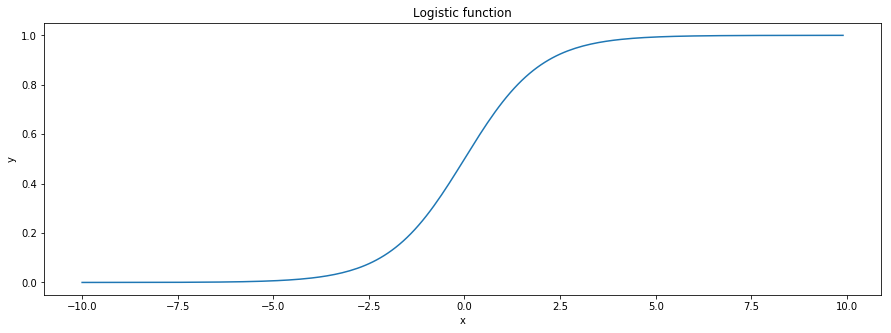

In [191]:
x = [i/10 for i in range(-100,100)]
y = [(1+np.exp(-x_i))**-1 for x_i in x]
plt.title('Logistic function')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)
plt.show()

### Implement from python scratch

In [192]:
def grads(f, x0, args=(), e=1e-5):
    gs = []
    for i in range(len(x0)):
        x = np.array(x0)
        x[i] += e
        g = (f(x, *args) - f(x0, *args)) / e
        gs.append(g)
    return gs

In [193]:
def gradient_descent(f, x0, args=(), alpha=1, maxiter=10000, tol=1e-3, full_return=False):
    J_his = []
    for i in range(maxiter):
        J = f(x0, *args)
        J_his.append(J)
        if J < tol:
            break
        g = grads(f, x0, args)
        x0 = np.array([x0[i] - alpha*g[i] for i in range(len(x0))])
    if full_return:
        return x0, J_his
    else:
        return x0

In [194]:
def logistic(z):
    return (1+np.exp(-z))**-1

def loss_fn(theta, X, y):
    z = np.dot(X, theta.reshape(-1, y.shape[1]))
    y_pred = logistic(z)
    loss = y*np.log(y_pred) + (1-y)*np.log(1-y_pred)
    return -loss.sum(axis=1).mean()

CPU times: user 15.3 s, sys: 0 ns, total: 15.3 s
Wall time: 15.3 s


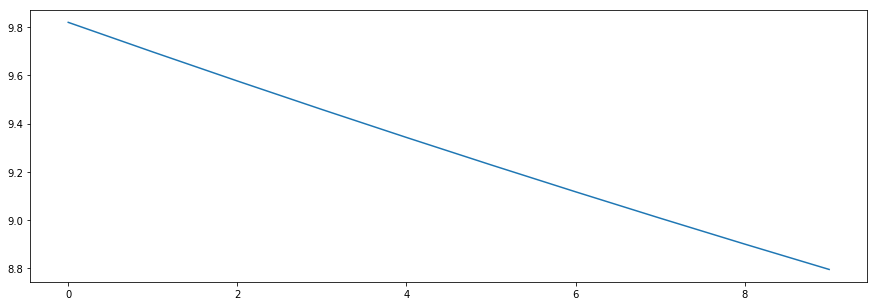

In [209]:
theta = np.random.rand(x_train.shape[1] * n_classes)
%time theta, J_his = gradient_descent(f=loss_fn, x0=theta, args=(x_train, y_train), full_return=True, maxiter=10)
x = list(range(len(J_his)))
plt.plot(x, J_his)
plt.show()

### Implement from scipy

CPU times: user 19.1 s, sys: 8.09 ms, total: 19.1 s
Wall time: 19.1 s


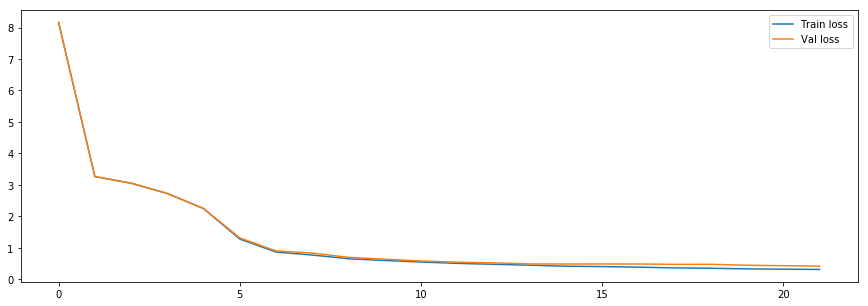

In [214]:
x_his = []
def callback(xk):
    x_his.append(xk)

theta = np.random.rand(x_train.shape[1] * n_classes)
%time theta = fmin_l_bfgs_b(func=loss_fn, x0=theta, args=(x_train, y_train), callback=callback, approx_grad=True)[0]
train_loss = [loss_fn(xk, x_train, y_train) for xk in x_his]
val_loss = [loss_fn(xk, x_test, y_test) for xk in x_his]
x = list(range(len(train_loss)))
plt.plot(x, train_loss, label='Train loss')
plt.plot(x, val_loss, label='Val loss')
plt.legend()
plt.show()

0.975


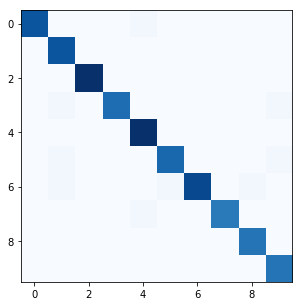

In [215]:
y_pred = x_test.dot(theta.reshape(-1, 10))
y_pred = np.argmax(y_pred, axis=1)
score = accuracy_score(np.argmax(y_test, 1), y_pred)
print(score)
cm = confusion_matrix(np.argmax(y_test, 1), y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)

### Implement from Scikit-learn

0.875


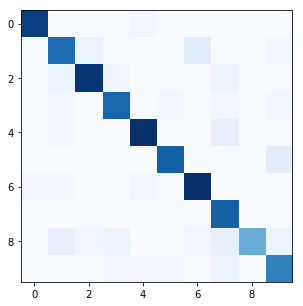

In [223]:
model = LogisticRegression(solver='lbfgs')
model.fit(x_train, np.argmax(y_train, axis=1))
y_pred = model.predict(x_test)
score = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print(score)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)

### Implement from Tensorflow